# Perceptron. Batch Gradient Descent

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [8]:
os.chdir('\\Users\\Егор\\python\\data')

Importing and Preprocessing data

In [9]:
Train = pd.read_csv('perceptron_train.csv', header=None)
X_train = Train.iloc[:,1:]
y_train = Train.iloc[:,:1]

Test = pd.read_csv('perceptron_test.csv', header=None)
X_test = Test.iloc[:,1:]
y_test = Test.iloc[:,:1]

In [10]:
sc_X = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train) # Calculate mu and sigma from train sample then tranform test sample
X_test_scale = sc_X.transform(X_test) 

Visualising data

In [11]:
#plt.scatter parameter 'c' wants y classes as a list 
y = y_train[0].tolist() 
y_t = y_test[0].tolist()

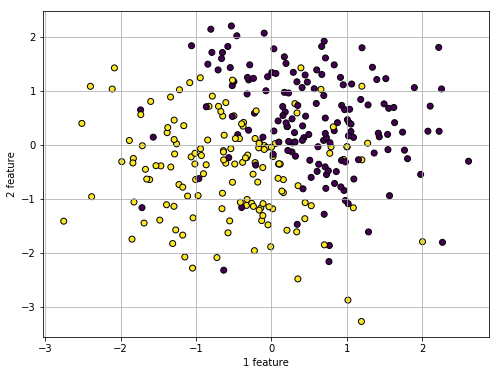

In [12]:
# Plot the training points
plt.figure(2, figsize=(8, 6))
plt.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('1 feature')
plt.ylabel('2 feature')
plt.grid()
plt.show()

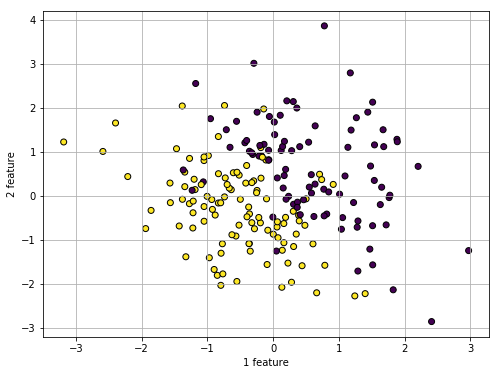

In [13]:
# Plot the test points
plt.figure(2, figsize=(8, 6))
plt.scatter(X_test_scale[:, 0], X_test_scale[:, 1], c=y_t, cmap='viridis', edgecolor='k')
plt.xlabel('1 feature')
plt.ylabel('2 feature')
plt.grid()
plt.show()

Learning algorithm

In [14]:
y_train = y_train.values
y_test = y_test.values

In [15]:
def gradient_descent(alpha, X_train_scale, y_train, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = X_train_scale.shape[0]
    
    # Random or negative initial weights are working, positive not.
    #w = [-0.5,-0.5]
    #b = 0
    w = np.random.random(X_train_scale.shape[1])
    b = np.random.random()

    dot = []
    x_l = []
    y_l = []
    for i in range(m):
        L = float((np.dot(w, X_train_scale[i:i+1,:].reshape(2,))+b)*y_train[i:i+1]) #+b
        if L < 0:
            dot.append(L)
            x_l.append(X_train_scale[i:i+1,:])
            y_l.append(y_train[i:i+1])
            

    loss = sum(dot)/len(dot)
    x_lo = np.array(x_l).reshape(len(dot),2)
    y_lo = np.array(y_l).reshape(len(dot),1)
    
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        
        grad_w = 1/len(dot) * sum(-(x_lo*y_lo))
        grad_b = 1/len(dot) * float(sum(-(y_lo)))

        # update the theta_temp
        temp_w = w - alpha * grad_w
        temp_b = b - alpha * grad_b
        
        # update theta
        w = temp_w
        b = temp_b

        # loss with new weights
        dot1 =[]
        x_l = []
        y_l = []
        for i in range(m):
            E = float((np.dot(w, X_train_scale[i:i+1,:].reshape(2,))+b)*y_train[i:i+1]) #+b
            if E < 0:
                dot1.append(E)
                x_l.append(X_train_scale[i:i+1,:])
                y_l.append(y_train[i:i+1])
                
        loss_upd = sum(dot1)/len(dot1)
        x_lo = np.array(x_l).reshape(len(dot1),2)
        y_lo = np.array(y_l).reshape(len(dot1),1)

        if abs(loss-loss_upd) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        loss = loss_upd   # update error 
        #x_l = x_l1
        #y_l = y_l1
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True
    
    return w,b

In [16]:
alpha = 0.01 # learning rate
ep = 0.00005 # convergence criteria

# call gredient decent, and get intercept(=theta0) and slope(=theta1)
weights, bias = gradient_descent(alpha, X_train_scale, y_train, ep, max_iter=10000)
print(weights, bias)

Converged, iterations:  196 !!!
[-0.03699115 -0.02918739] 0.0005358736049137002


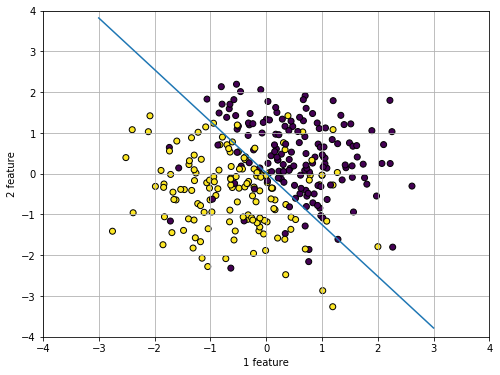

In [17]:
xx = np.linspace(-3, 3)
a = -weights[0]/weights[1]
yy = a*xx - bias/weights[1]

plt.figure(2, figsize=(8, 6))

# Plot the training points
plt.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c=y, cmap='viridis',    #plt.cm.Set1,
            edgecolor='k')

plt.plot(xx, yy)
plt.ylim(-4,4)
plt.xlim(-4,4)

plt.xlabel('1 feature')
plt.ylabel('2 feature')
plt.grid()
plt.show()

Check on test data

In [18]:
m_test = X_test_scale.shape[0]
dot_test = []
x_l = []
y_l = []
for i in range(m_test):
    L = float((np.dot(weights, X_test_scale[i:i+1,:].reshape(2,))+bias)*y_test[i:i+1]) #+b
    if L < 0:
        dot_test.append(L)
        x_l.append(X_test_scale[i:i+1,:])
        y_l.append(y_test[i:i+1])

print('accuracy:', 1-len(dot_test)/len(X_test_scale))

accuracy: 0.895


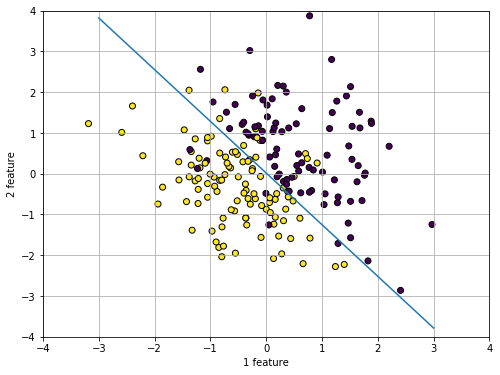

In [19]:
xx = np.linspace(-3, 3)
a = -weights[0]/weights[1]
yy = a*xx - bias/weights[1]

plt.figure(2, figsize=(8, 6))

# Plot the test points
plt.scatter(X_test_scale[:, 0], X_test_scale[:, 1], c=y_t, cmap='viridis',    #plt.cm.Set1,
            edgecolor='k')

plt.plot(xx, yy)
plt.ylim(-4,4)
plt.xlim(-4,4)

plt.xlabel('1 feature')
plt.ylabel('2 feature')
plt.grid()
plt.show()